<a href="https://colab.research.google.com/github/sharad-rathod/Resume_Classification_NLP/blob/main/ResumeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resume Classification**

**Introduction**

This project aims to develop an automated resume classification system using NLP techniques. The system will analyze and categorize resumes based on their content, extracting relevant information and assigning appropriate labels. By leveraging NLP, the system will streamline the recruitment process, reduce manual effort, and ensure fair and unbiased candidate evaluation. The project involves data collection, preprocessing, NLP pipeline implementation, machine learning model training and deployment as an interactive application or integration with existing recruitment software. Overall, this project revolutionizes resume processing and enhances recruitment efficiency.

***Problem Statement***

The problem statement for this project is to develop an automated system that can accurately categorize resumes into specific job categories or domains.

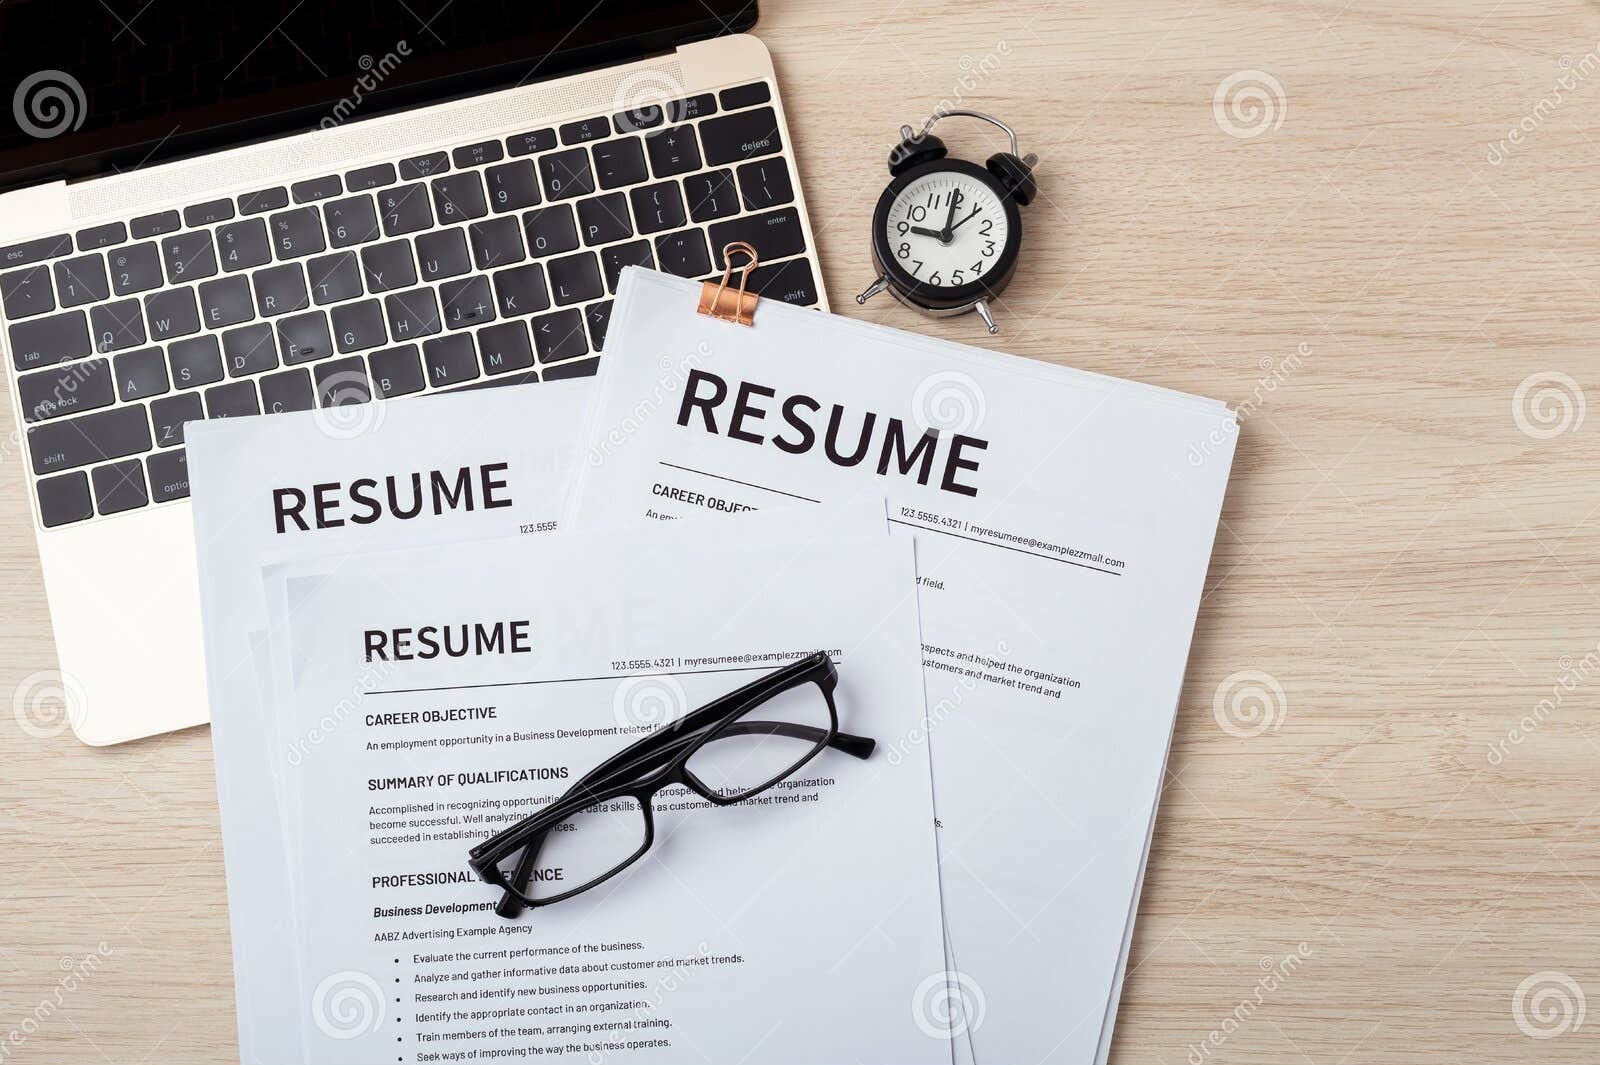

In [2]:
from IPython import display
display.Image("/content/jobresume.jpg")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas.plotting import scatter_matrix
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
df = pd.read_csv("/content/ResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


No charts were generated by quickchart


In [7]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Resume').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [9]:
df['Category'].nunique()

25

In [10]:
print(df['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


<Axes: xlabel='Category', ylabel='count'>

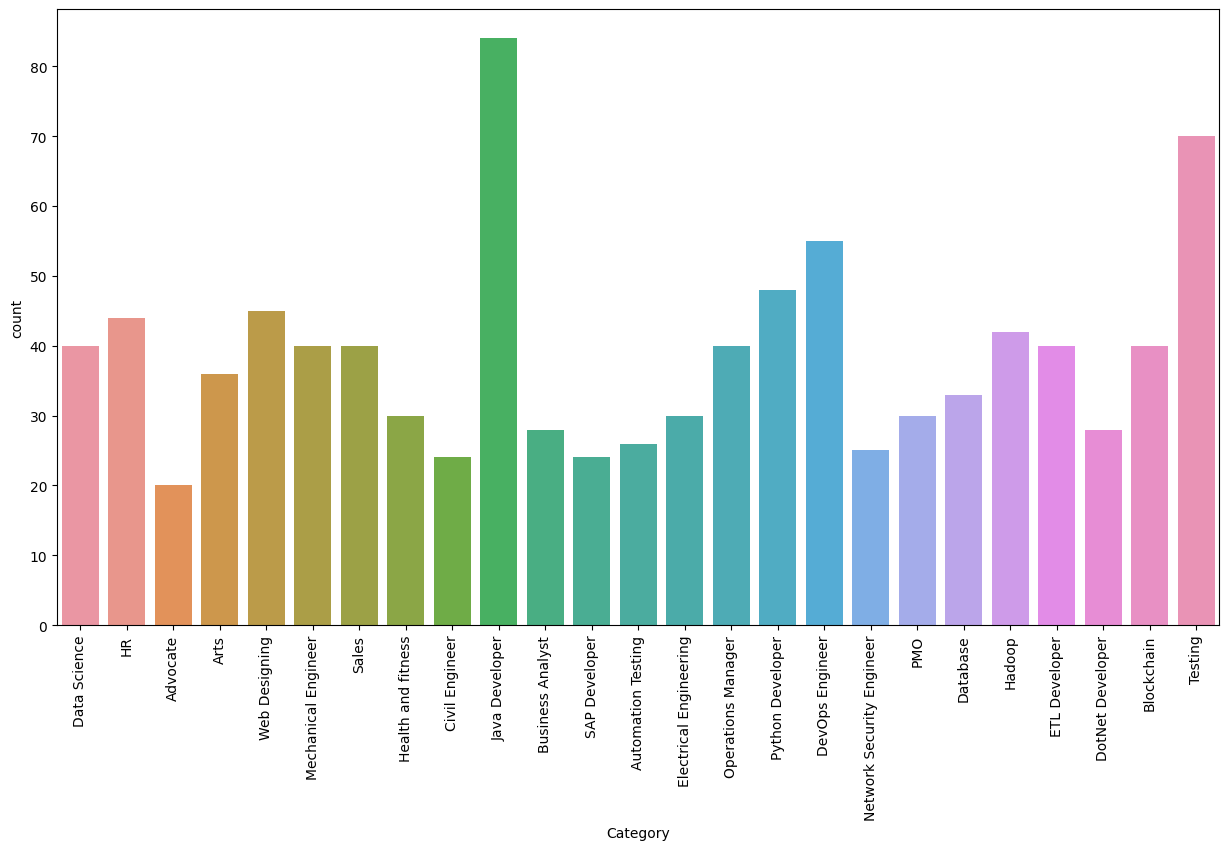

In [15]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df, x = 'Category')

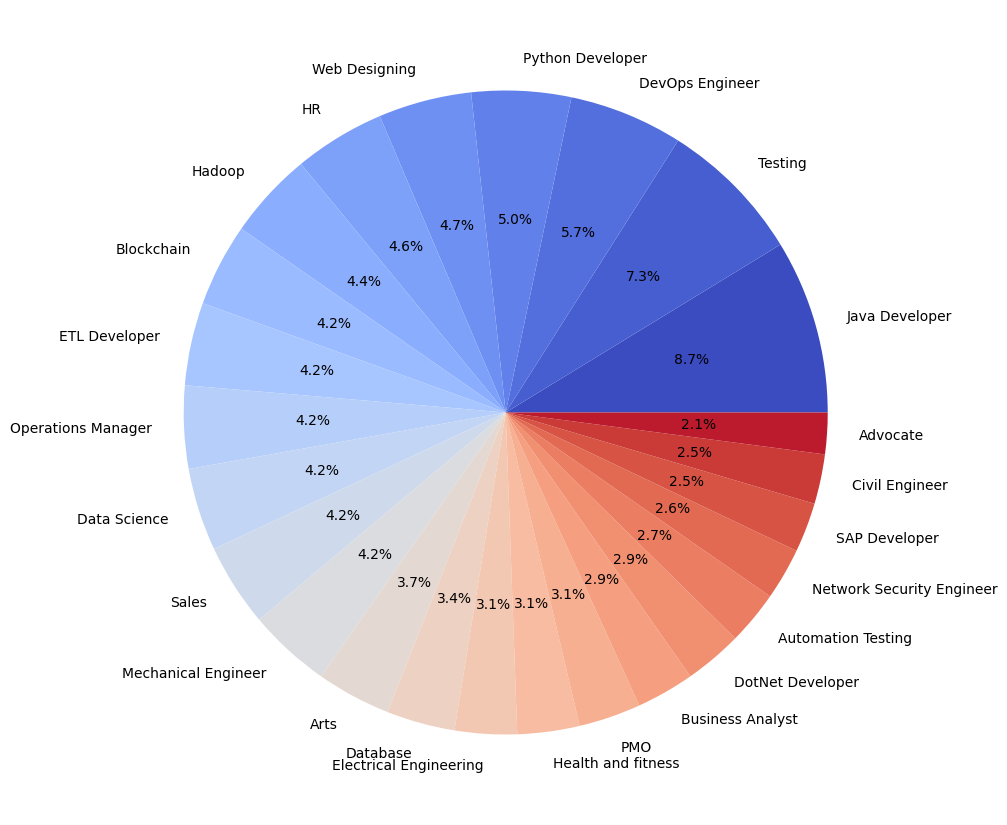

In [17]:
targetCounts = df['Category'].value_counts()
targetLabels = targetCounts.index
plt.figure(1, figsize = (25,23))
theGrid = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,2)]
plt.subplot(theGrid[0,1], aspect = 1)

sourcePie = plt.pie(targetCounts, labels = targetLabels, colors = colors, autopct= '%1.1f%%')
plt.show()

*Data Cleaning*

In [18]:
df['Resume'] = df['Resume'].str.lower()
print(df['Resume'])

0      skills * programming languages: python (pandas...
1      education details \r\nmay 2013 to may 2017 b.e...
2      areas of interest deep learning, control syste...
3      skills â¢ r â¢ python â¢ sap hana â¢ table...
4      education details \r\n mca   ymcaust,  faridab...
                             ...                        
957    computer skills: â¢ proficient in ms office (...
958    â willingness to accept the challenges. â ...
959    personal skills â¢ quick learner, â¢ eagerne...
960    computer skills & software knowledge ms-power ...
961    skill set os windows xp/7/8/8.1/10 database my...
Name: Resume, Length: 962, dtype: object


In [19]:
import re

In [20]:
def CleanResume(resumeText):
  resumeText = re.sub('http\S+\s*', ' ',resumeText)   # Removing https
  resumeText = re.sub('RT|cc', ' ', resumeText)       # To remove particular word
  resumeText = re.sub('#\S+', '', resumeText )        # Removing sentence with # till space is not coming
  resumeText = re.sub('@\S+', ' ', resumeText)        # Removing sentence start with @ and remove till space is not coming.
  resumeText = re.sub('[%s]' % re.escape("""|"#$%&'()*+,-./:;<=>?@[\]^_'{|}~"""), ' ', resumeText)  # Removing the Punctuation
  resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)  # Remove non ascii letters
  resumeText = re.sub('\s+', ' ', resumeText)             #
  return resumeText

In [21]:
df['cleaned_resume'] = df['Resume'].apply(lambda x: CleanResume(x))

In [22]:
print(df['cleaned_resume'][30])

skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the r

In [23]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 b e uit...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...


In [24]:
sentLens = []
for i in df.cleaned_resume:
  length = len(i.split())
  sentLens.append(length)

print(len(sentLens))
print(max(sentLens))

962
2062


In [25]:
df['Resume'][100]

'skills: natural languages: proficient in english, hindi and marathi. computer skills: proficient with ms-office, internet operation.education details \r\njanuary 2015 to january 2018 llb law mumbai, maharashtra mumbai university\r\njanuary 2015 b.m.m  mumbai, maharashtra s.k.somaiya college, mumbai university\r\n h.s.c   asmita girls junior college, maharashtra board\r\n s.s.c vidya bhawan  maharashtra board\r\nadvocate \r\n\r\nllb student and journalist\r\nskill details \r\ncompany details \r\ncompany - criminal lawyer (law firm)\r\ndescription - '

In [26]:
df['cleaned_resume'][100]

'skills natural languages proficient in english hindi and marathi computer skills proficient with ms office internet operation education details january 2015 to january 2018 llb law mumbai maharashtra mumbai university january 2015 b m m mumbai maharashtra s k somaiya college mumbai university h s c asmita girls junior college maharashtra board s s c vidya bhawan maharashtra board advocate llb student and journalist skill details company details company criminal lawyer law firm description '

In [27]:
setOFStopWords = set(stopwords.words('english'))

In [28]:
setOFStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [29]:
totalWords = []
sentences = df['cleaned_resume'].values
cleanedSent = ''

for i in range(1,160):
  cleanedText = CleanResume(sentences[i])
  cleanedSent += cleanedText
  requiredWords = nltk.word_tokenize(cleanedText)
  for word in requiredWords:
    if word not in setOFStopWords and word not in string.punctuation:
      totalWords.append(word)

wordFreqDist = nltk.FreqDist(totalWords)
mostCommon = wordFreqDist.most_common(50)
print(mostCommon)

[('details', 485), ('exprience', 443), ('data', 405), ('company', 397), ('months', 392), ('description', 357), ('1', 290), ('project', 254), ('year', 251), ('january', 216), ('learning', 208), ('science', 205), ('less', 204), ('skill', 189), ('python', 170), ('maharashtra', 166), ('6', 163), ('machine', 155), ('college', 146), ('education', 145), ('arts', 144), ('university', 140), ('web', 134), ('development', 133), ('skills', 133), ('like', 126), ('india', 120), ('management', 120), ('application', 120), ('software', 116), ('team', 115), ('analytics', 114), ('using', 109), ('business', 108), ('sql', 103), ('developed', 102), ('monthscompany', 101), ('b', 98), ('time', 98), ('c', 98), ('used', 97), ('experience', 96), ('mumbai', 96), ('knowledge', 94), ('projects', 93), ('hr', 92), ('engineering', 90), ('pune', 90), ('technologies', 88), ('database', 87)]


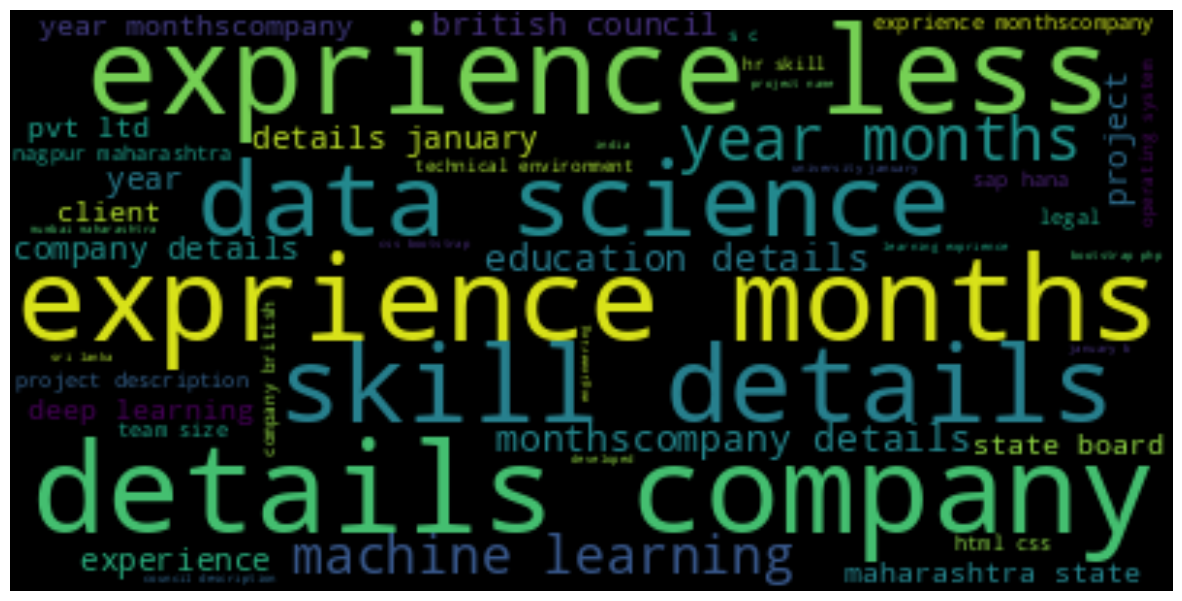

In [30]:
wc = WordCloud().generate(cleanedSent)
plt.figure(figsize= (15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [31]:
lenc = LabelEncoder()
df['Category_Labelled'] = lenc.fit_transform(df['Category'])

In [32]:
df.head()

,Category,Resume,cleaned_resume,Category_Labelled
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...,6
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 b e uit...,6
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...,6
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...,6


In [33]:
Text = df['cleaned_resume'].values
op_labels = df['Category_Labelled'].values

*Text Vectorization*

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

wordVectorizer = TfidfVectorizer(max_features=1500)
wordVectorizer.fit(Text)
features = wordVectorizer.transform(Text)


In [35]:
wordVectorizer.get_feature_names_out()

array(['01', '07', '10', ..., 'xp', 'year', 'years'], dtype=object)

*Train Test Split*

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features,op_labels, test_size = 0.25)

### *Naive Bayes*

In [37]:
mnb = MultinomialNB()

In [38]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [39]:
mnb.score(x_train, y_train)

0.9431345353675451

In [40]:
mnb.score(x_test, y_test)

0.9253112033195021

In [41]:
predicted = mnb.predict(x_test)

In [42]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00        10
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         9
           4       1.00      0.86      0.92         7
           5       1.00      0.88      0.93         8
           6       0.80      0.89      0.84         9
           7       1.00      0.80      0.89        10
           8       0.85      1.00      0.92        11
           9       1.00      0.33      0.50         6
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         6
          12       1.00      0.92      0.96        12
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         6
          15       0.78      1.00      0.88        25
          16       1.00      1.00      1.00        10
          17       1.00    

## *Logistic Regression*

In [43]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [44]:
log.score(x_test,y_test)

1.0

In [45]:
log.score(x_train,y_train)

0.9958391123439667

In [46]:
y_pre=log.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [48]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        10
          17       1.00    

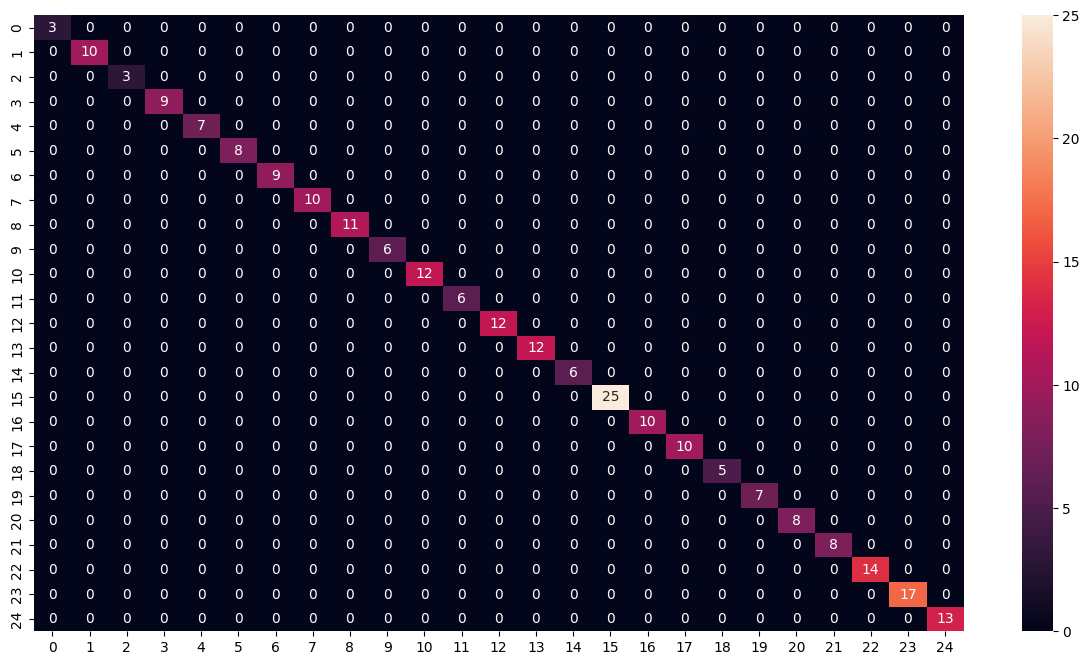

In [50]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)
plt.show()

## *Decision Tree Classifier :*

In [51]:
from sklearn.tree import DecisionTreeClassifier
dis=DecisionTreeClassifier(random_state=0)
dis.fit(x_train,y_train)
y_pre_ds=dis.predict(x_test)

In [52]:
dis.score(x_train,y_train)

1.0

In [53]:
dis.score(x_test,y_test)

0.991701244813278

In [54]:
print(classification_report(y_test,y_pre_ds))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         8
           6       0.82      1.00      0.90         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        10
          17       1.00    

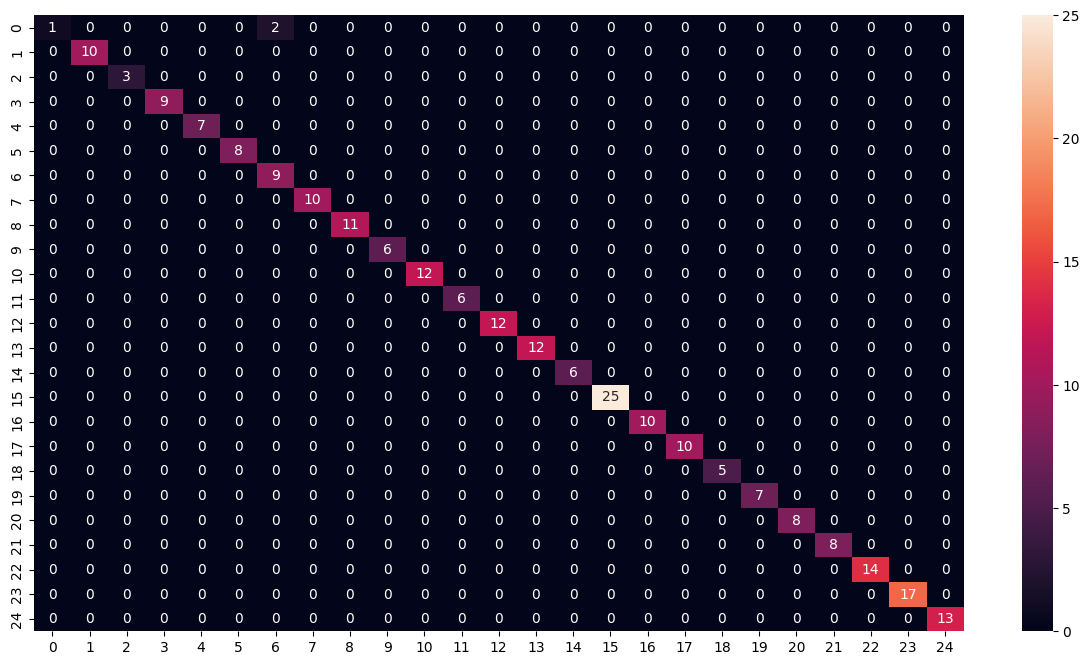

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,y_pre_ds),annot=True)
plt.show()

## *support vector machine*

In [57]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(x_train,y_train)

LinearSVC()

In [58]:
lsvc.score(x_train, y_train)

1.0

In [59]:
lsvc.score(x_test, y_test)

1.0

In [60]:
y_pred = lsvc.predict(x_test)

In [61]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        10
          17       1.00    

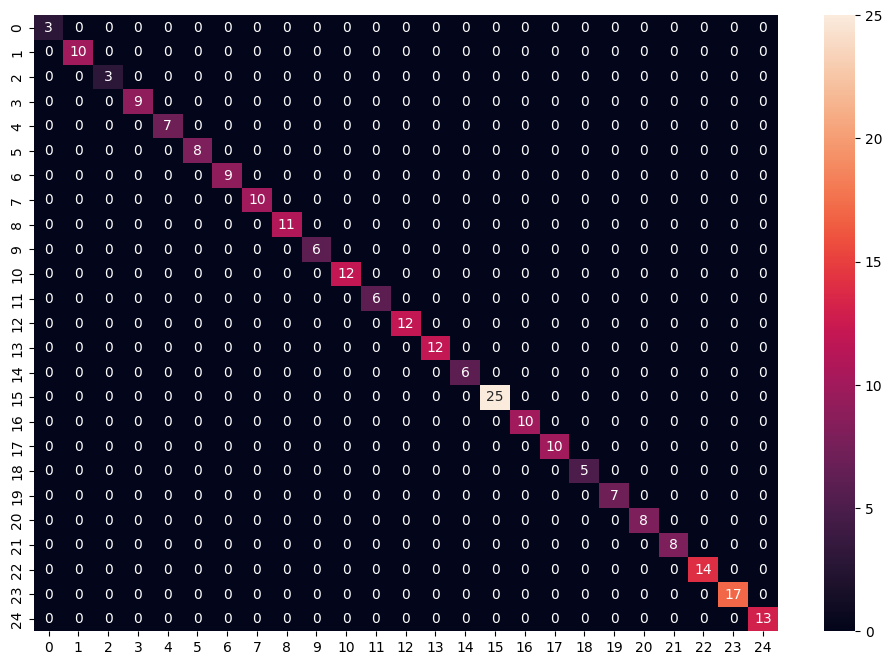

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

### KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [64]:
knn.score(x_train,y_train)

0.9833564493758669

In [65]:
knn.score(x_test,y_test)

0.991701244813278

In [66]:
y_predict = knn.predict(x_test)

In [67]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         9
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         6
          12       1.00      0.83      0.91        12
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        10
          17       1.00    

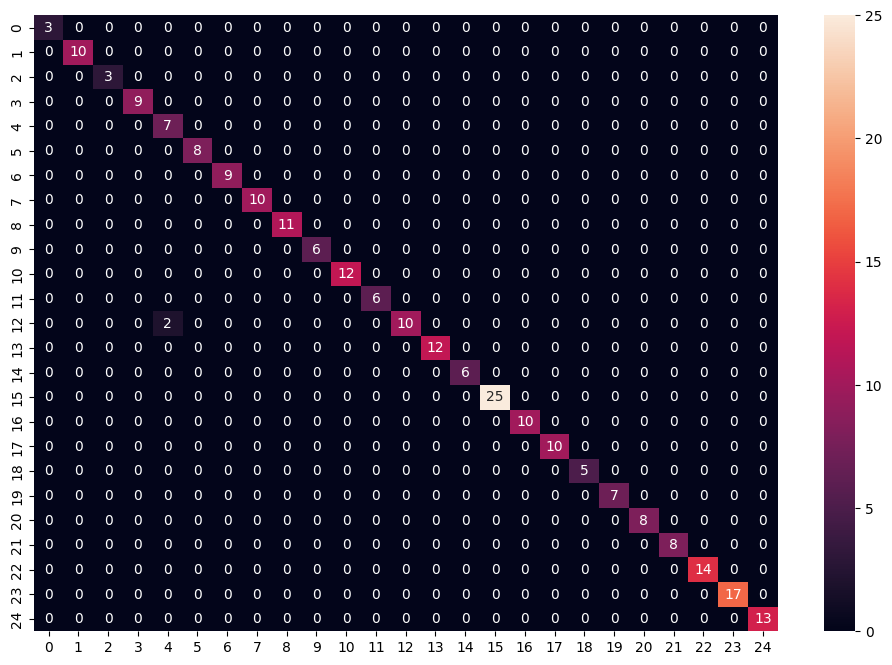

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

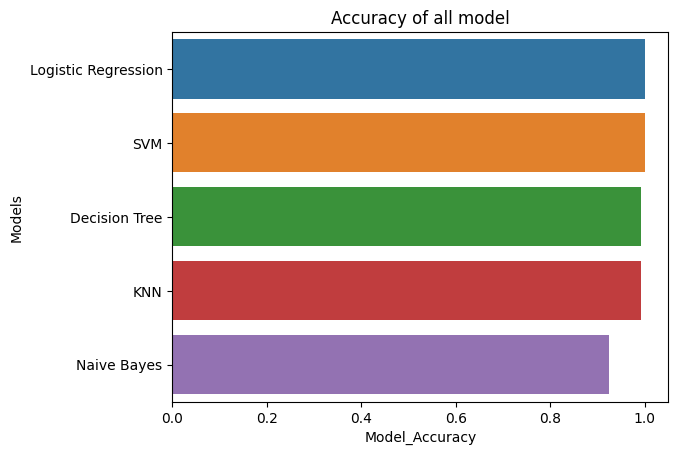

In [69]:
df1=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','SVM','KNN','Naive Bayes'],
                     'Accuracy':[log.score(x_test,y_test),dis.score(x_test,y_test),lsvc.score(x_test,y_test),
                                 knn.score(x_test,y_test),mnb.score(x_test,y_test)]})
df_dd=df1.sort_values('Accuracy',ascending=False)
sns.barplot(data=df_dd, x='Accuracy', y='Model')
plt.xlabel('Model_Accuracy')
plt.ylabel('Models')
plt.title('Accuracy of all model')
plt.show()

### ****This is truly remarkable! **Accuracy** rate exceeding 99% on the test dataset. ****